In [1]:
import torch
import torchvision
import numpy as np

In [2]:
from torchvision.datasets import MNIST

In [3]:
dataset = MNIST("./DATA",train=True, download = True)

In [4]:
test_dataset = MNIST("./DATA",train=False, download = True)

In [5]:
len(dataset)

60000

In [6]:
len(test_dataset)

10000

In [7]:
import torchvision.transforms as transforms

In [8]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [9]:
dataset[0][0].shape

torch.Size([1, 28, 28])

In [10]:
test_dataset = MNIST(root='data/', 
                train=False,
                transform=transforms.ToTensor())

In [11]:
test_dataset[0][0].shape

torch.Size([1, 28, 28])

In [12]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [13]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


In [14]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [15]:
from torch.utils.data import DataLoader, random_split

In [16]:
train_ds, val_ds = random_split(dataset, lengths=[50000, 10000])

In [17]:
len(train_ds), len(val_ds)

(50000, 10000)

In [18]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [19]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [20]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [21]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0347,  0.0044,  0.0034,  ..., -0.0168,  0.0220,  0.0310],
        [-0.0332, -0.0003,  0.0225,  ...,  0.0070,  0.0131, -0.0146],
        [-0.0261,  0.0157,  0.0203,  ..., -0.0121,  0.0129, -0.0062],
        ...,
        [ 0.0223,  0.0140, -0.0259,  ...,  0.0052,  0.0271, -0.0174],
        [-0.0293, -0.0223,  0.0159,  ...,  0.0239, -0.0045,  0.0105],
        [-0.0219,  0.0255, -0.0258,  ..., -0.0227,  0.0293,  0.0207]],
       requires_grad=True), Parameter containing:
tensor([ 0.0175,  0.0143, -0.0279,  0.0129, -0.0171, -0.0083, -0.0119,  0.0059,
         0.0172,  0.0303], requires_grad=True)]


In [22]:
class Mnist_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = Mnist_model()

In [23]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0167,  0.0011,  0.0144,  ..., -0.0017, -0.0240,  0.0161],
         [ 0.0274, -0.0296,  0.0062,  ...,  0.0034,  0.0043, -0.0095],
         [-0.0343,  0.0241,  0.0177,  ..., -0.0057,  0.0040,  0.0180],
         ...,
         [-0.0013, -0.0299, -0.0125,  ..., -0.0078,  0.0006, -0.0327],
         [-0.0124, -0.0109,  0.0343,  ...,  0.0336, -0.0250, -0.0322],
         [-0.0333, -0.0129,  0.0135,  ...,  0.0020,  0.0046,  0.0049]],
        requires_grad=True), Parameter containing:
 tensor([-0.0084, -0.0309, -0.0259, -0.0280, -0.0074,  0.0165, -0.0319,  0.0092,
         -0.0163, -0.0054], requires_grad=True)]

In [24]:
import torch.nn.functional as F

In [25]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0167, -0.1958, -0.1402,  0.1593,  0.1069,  0.0121, -0.0645, -0.1198,
          0.1362, -0.1028],
        [ 0.2689,  0.0309,  0.2486, -0.0462,  0.1639,  0.1626, -0.2473, -0.3456,
         -0.1860, -0.2638]])


In [26]:
probs = F.softmax(outputs, dim=1)

print("Sample probabilities:\n", probs[:2].data)

print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1029, 0.0832, 0.0880, 0.1187, 0.1126, 0.1025, 0.0949, 0.0898, 0.1160,
         0.0913],
        [0.1306, 0.1029, 0.1280, 0.0953, 0.1176, 0.1174, 0.0779, 0.0707, 0.0829,
         0.0767]])
Sum:  0.9999998807907104


In [27]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([3, 0, 6, 7, 5, 0, 4, 1, 1, 4, 1, 3, 9, 6, 3, 2, 9, 4, 4, 7, 2, 9, 9, 4,
        4, 4, 4, 8, 2, 3, 3, 4, 3, 4, 8, 3, 0, 8, 7, 2, 3, 2, 6, 7, 8, 3, 4, 2,
        9, 8, 4, 9, 2, 4, 7, 0, 5, 0, 4, 1, 4, 1, 0, 0, 3, 0, 3, 4, 5, 3, 1, 2,
        4, 2, 9, 2, 9, 3, 1, 3, 8, 4, 2, 8, 4, 0, 3, 5, 0, 1, 4, 4, 0, 0, 0, 4,
        3, 6, 1, 7, 0, 8, 5, 8, 4, 1, 3, 8, 4, 3, 4, 8, 0, 3, 7, 8, 2, 6, 4, 6,
        3, 0, 5, 1, 4, 3, 4, 3])
tensor([0.1187, 0.1306, 0.1186, 0.1244, 0.1333, 0.1296, 0.1303, 0.1199, 0.1116,
        0.1162, 0.1215, 0.1232, 0.1218, 0.1125, 0.1093, 0.1319, 0.1141, 0.1233,
        0.1288, 0.1182, 0.1242, 0.1263, 0.1149, 0.1512, 0.1151, 0.1392, 0.1400,
        0.1243, 0.1388, 0.1446, 0.1227, 0.1310, 0.1184, 0.1159, 0.1117, 0.1158,
        0.1360, 0.1123, 0.1135, 0.1453, 0.1160, 0.1315, 0.1277, 0.1170, 0.1226,
        0.1305, 0.1328, 0.1176, 0.1218, 0.1199, 0.1484, 0.1279, 0.1277, 0.1245,
        0.1152, 0.1177, 0.1277, 0.1228, 0.1316, 0.1300, 0.1371, 0.1239, 0.1313,
       

In [28]:
labels

tensor([7, 7, 3, 1, 7, 8, 4, 3, 5, 4, 8, 1, 3, 1, 8, 4, 2, 4, 9, 4, 4, 2, 2, 4,
        7, 7, 7, 9, 3, 5, 7, 9, 1, 1, 9, 1, 8, 4, 5, 8, 1, 3, 6, 7, 9, 8, 4, 4,
        2, 8, 0, 2, 4, 5, 7, 5, 0, 0, 3, 6, 6, 8, 2, 3, 1, 8, 5, 7, 0, 7, 8, 3,
        6, 3, 2, 3, 6, 7, 2, 5, 3, 0, 4, 9, 9, 2, 5, 0, 0, 8, 4, 0, 3, 0, 0, 6,
        1, 7, 8, 1, 2, 9, 5, 9, 7, 6, 2, 9, 6, 7, 4, 9, 4, 8, 4, 4, 3, 3, 4, 2,
        5, 8, 7, 6, 7, 1, 9, 1])

In [29]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [30]:
accuracy(outputs, labels)

tensor(0.1328)

In [31]:
loss_fn = F.cross_entropy

In [32]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2704, grad_fn=<NllLossBackward>)


In [33]:
num_classes

10

In [34]:
class MnistModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch}], val_loss:{result['val_loss']:.4f}, val_acc: {result['val_acc']:.4f}")

model = MnistModel()

In [35]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [36]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.294679880142212, 'val_acc': 0.10670490562915802}

In [37]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss:1.9358, val_acc: 0.6060
Epoch [1], val_loss:1.6716, val_acc: 0.7239
Epoch [2], val_loss:1.4743, val_acc: 0.7593
Epoch [3], val_loss:1.3251, val_acc: 0.7788
Epoch [4], val_loss:1.2104, val_acc: 0.7928


In [38]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss:1.1201, val_acc: 0.8024
Epoch [1], val_loss:1.0476, val_acc: 0.8109
Epoch [2], val_loss:0.9882, val_acc: 0.8170
Epoch [3], val_loss:0.9386, val_acc: 0.8211
Epoch [4], val_loss:0.8967, val_acc: 0.8251


In [39]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss:0.8607, val_acc: 0.8278
Epoch [1], val_loss:0.8296, val_acc: 0.8314
Epoch [2], val_loss:0.8023, val_acc: 0.8353
Epoch [3], val_loss:0.7781, val_acc: 0.8376
Epoch [4], val_loss:0.7566, val_acc: 0.8399


In [40]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss:0.7372, val_acc: 0.8420
Epoch [1], val_loss:0.7197, val_acc: 0.8440
Epoch [2], val_loss:0.7038, val_acc: 0.8462
Epoch [3], val_loss:0.6894, val_acc: 0.8479
Epoch [4], val_loss:0.6761, val_acc: 0.8491


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

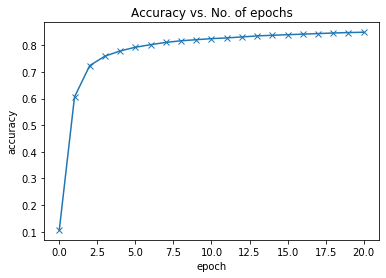

In [41]:

history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [42]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


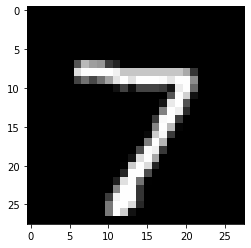

In [43]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [44]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [45]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


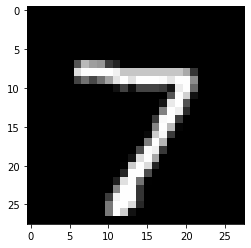

In [46]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [47]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6428991556167603, 'val_acc': 0.860546886920929}